In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus 

In [6]:
data = pd.read_csv("titanic_train.csv", sep=',')
data = data.dropna()

In [7]:
outcome = data["Survived"]
data = data.drop(['Survived', 'Name', 'Ticket', 'Cabin', 'Embarked', 'PassengerId'], axis=1)
data['Sex'] = data['Sex'].apply(lambda x: 1. if x == 'female' else 0.)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data, outcome, test_size=0.3, random_state = 0)

In [9]:
clf = tree.DecisionTreeClassifier(max_features=3, max_depth=2)

In [10]:
clf = clf.fit(X_train, y_train)

In [11]:
prediction = clf.predict(X_test)

In [12]:
print data.columns

Index([u'Pclass', u'Sex', u'Age', u'SibSp', u'Parch', u'Fare'], dtype='object')


In [14]:
dot_data = StringIO() 

In [15]:
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=data.columns,
                         class_names=['Perished','Survived'], 
                         filled=True, rounded=True,
                         proportion = True,
                         special_characters=True) 

In [17]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

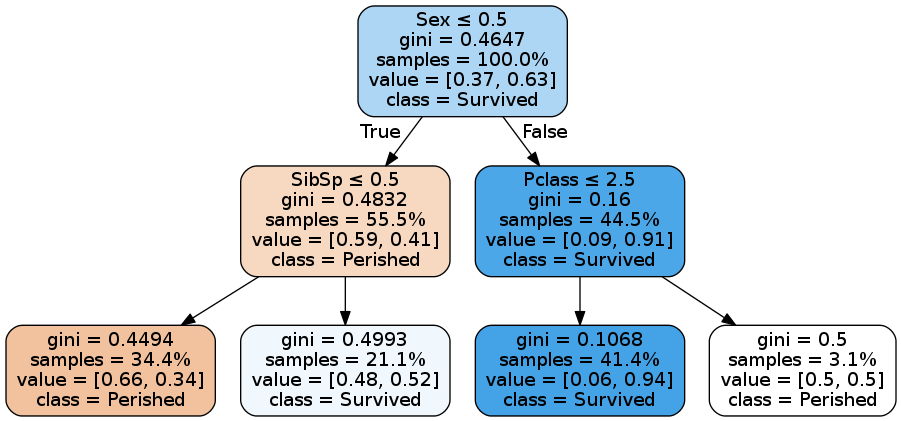

In [18]:
Image(graph.create_png())